In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
titanic.shape

(891, 15)

In [6]:
titanic = titanic.drop_duplicates()
titanic.shape

(784, 15)

In [7]:
titanic.tail() #mostra as ultimas linhas do DF

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [8]:
titanic.reset_index(drop = True, inplace = True) #reseta os index dps do drop_duplicates()

In [9]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
779,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
783,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [10]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
titanic_sem_na = titanic.dropna(axis = 1)

In [12]:
titanic_sem_na.shape

(784, 11)

In [13]:
titanic_sem_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   class       784 non-null    category
 7   who         784 non-null    object  
 8   adult_male  784 non-null    bool    
 9   alive       784 non-null    object  
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 51.6+ KB


In [14]:
titanic_sem_na = titanic_sem_na.drop('alive', axis = 1)

In [15]:
titanic_sem_na = titanic_sem_na.drop('pclass', axis = 1)

In [16]:
titanic_encoded = pd.get_dummies(titanic_sem_na, columns = ['class','who'], drop_first = True)
titanic_encoded.head()

,survived,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,male,1,0,7.2500,True,False,0,1,1,0
1,1,female,1,0,71.2833,False,False,0,0,0,1
2,1,female,0,0,7.9250,False,True,0,1,0,1
3,1,female,1,0,53.1000,False,False,0,0,0,1
4,0,male,0,0,8.0500,True,True,0,1,1,0


In [17]:
titanic_encoded.sex = titanic_encoded.sex.map({'female':1,'male':0})
titanic_encoded.head()

,survived,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,0,1,0,7.2500,True,False,0,1,1,0
1,1,1,1,0,71.2833,False,False,0,0,0,1
2,1,1,0,0,7.9250,False,True,0,1,0,1
3,1,1,1,0,53.1000,False,False,0,0,0,1
4,0,0,0,0,8.0500,True,True,0,1,1,0


In [18]:
titanic_encoded.adult_male = titanic_encoded.adult_male.astype(int)
titanic_encoded.alone = titanic_encoded.alone.astype(int)

In [19]:
y = titanic_encoded.survived #conjunto de dados target, o que nós queremos prever a probabilidade

In [20]:
x = titanic_encoded.drop('survived', axis = 1) #conjunto de dados explicativos, que iram prever o target (y)

In [21]:
clf = DecisionTreeClassifier(random_state = 100) #criação da arvore de decisão (criação da base, sem parametros ainda)
clf

DecisionTreeClassifier(random_state=100)

In [22]:
clf = clf.fit(x[['adult_male']], y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.5, 0.75, 'adult_male <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 333\nvalue = [95, 238]\nclass = Survived'),
 Text(0.75, 0.25, 'gini = 0.306\nsamples = 451\nvalue = [366, 85]\nclass = Died')]

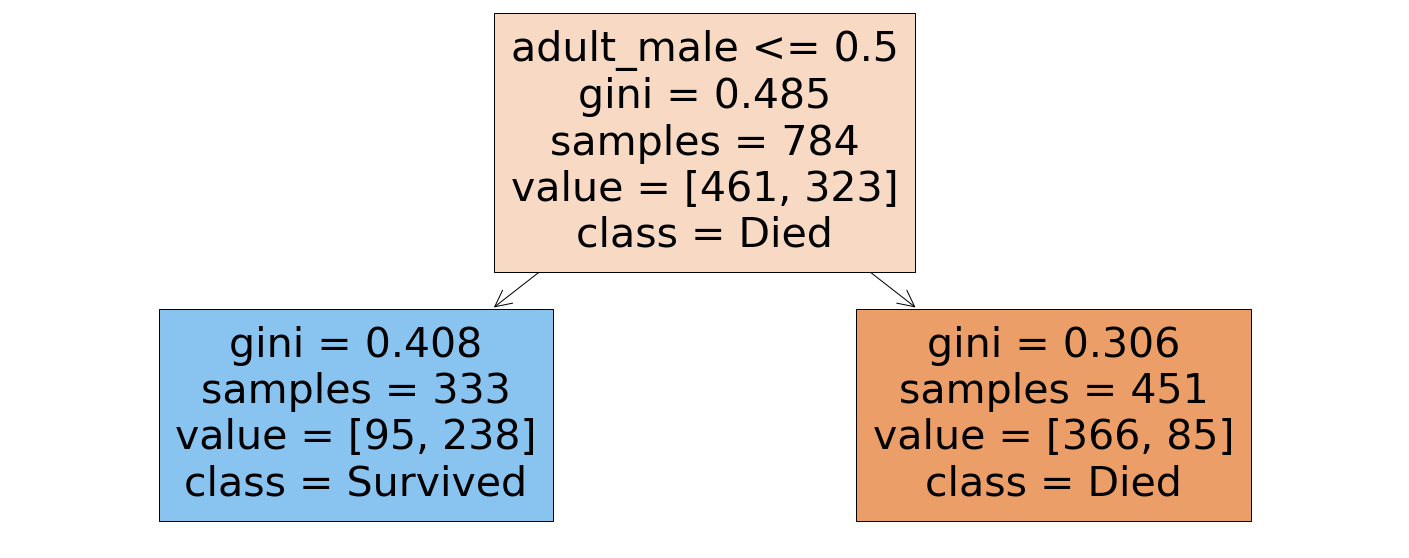

In [23]:
plt.figure(figsize = (25,10))
plot_tree(clf,
         filled = True,
         class_names = ['Died','Survived'],
         feature_names = ['adult_male'])

In [24]:
clf = clf.fit(x[['class_Third']],y)
clf

DecisionTreeClassifier(random_state=100)

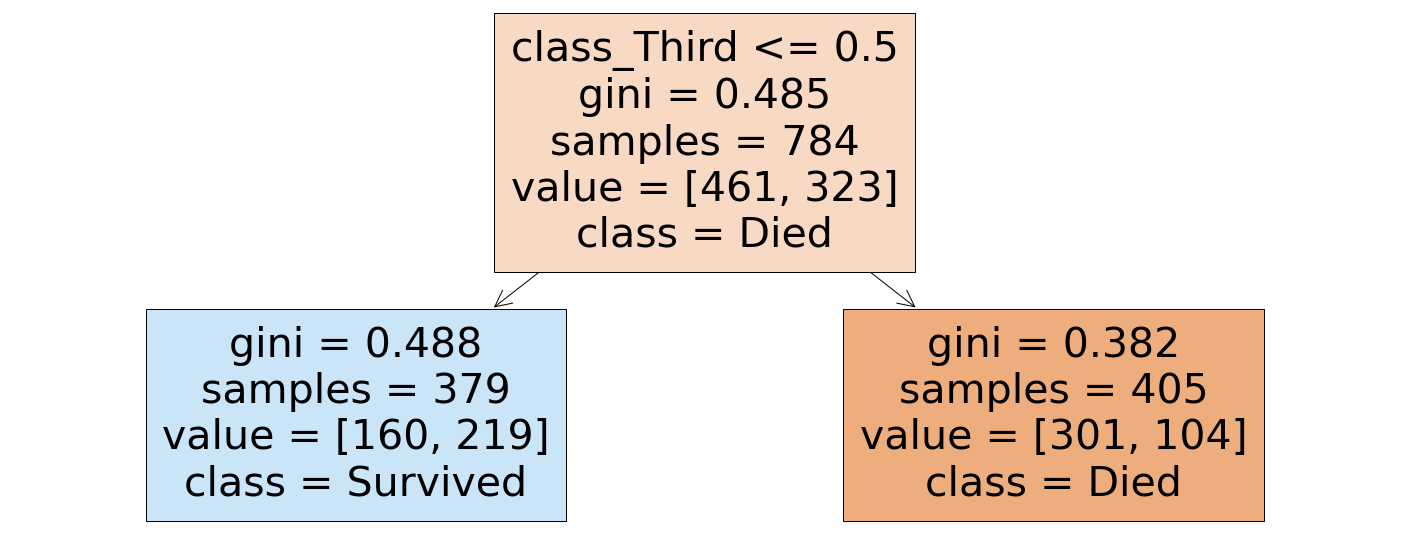

In [25]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=['class_Third']);

In [26]:
clf = clf.fit(x[['adult_male','class_Third']],y)
clf

DecisionTreeClassifier(random_state=100)

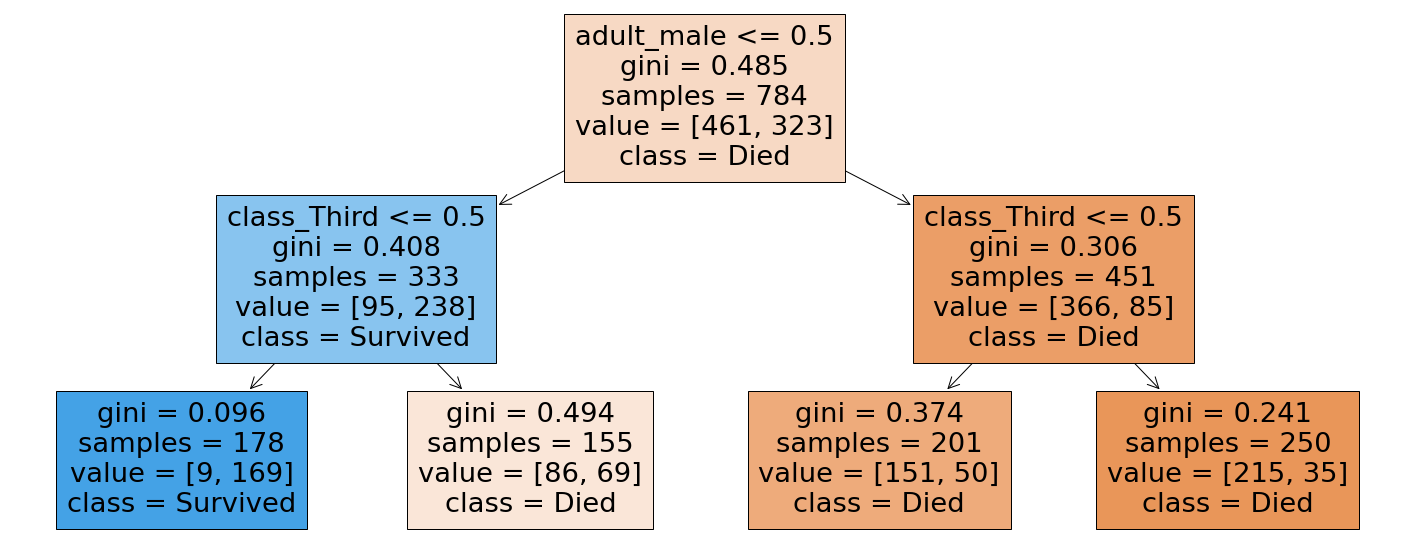

In [27]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Died', 'Survived'],
          feature_names=['adult_male','class_Third']);

In [28]:
clf = clf.fit(x,y)
clf

DecisionTreeClassifier(random_state=100)

[Text(0.47796610169491527, 0.9736842105263158, 'who_man <= 0.5\ngini = 0.485\nsamples = 784\nvalue = [461, 323]\nclass = Died'),
 Text(0.21620762711864408, 0.9210526315789473, 'class_Third <= 0.5\ngini = 0.408\nsamples = 333\nvalue = [95, 238]\nclass = Survived'),
 Text(0.10762711864406779, 0.868421052631579, 'fare <= 28.856\ngini = 0.096\nsamples = 178\nvalue = [9, 169]\nclass = Survived'),
 Text(0.07966101694915254, 0.8157894736842105, 'fare <= 28.231\ngini = 0.176\nsamples = 72\nvalue = [7, 65]\nclass = Survived'),
 Text(0.07288135593220339, 0.7631578947368421, 'parch <= 0.5\ngini = 0.155\nsamples = 71\nvalue = [6, 65]\nclass = Survived'),
 Text(0.05084745762711865, 0.7105263157894737, 'alone <= 0.5\ngini = 0.201\nsamples = 44\nvalue = [5, 39]\nclass = Survived'),
 Text(0.02711864406779661, 0.6578947368421053, 'fare <= 22.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = Survived'),
 Text(0.013559322033898305, 0.6052631578947368, 'fare <= 17.429\ngini = 0.444\nsamples = 3\nvalu

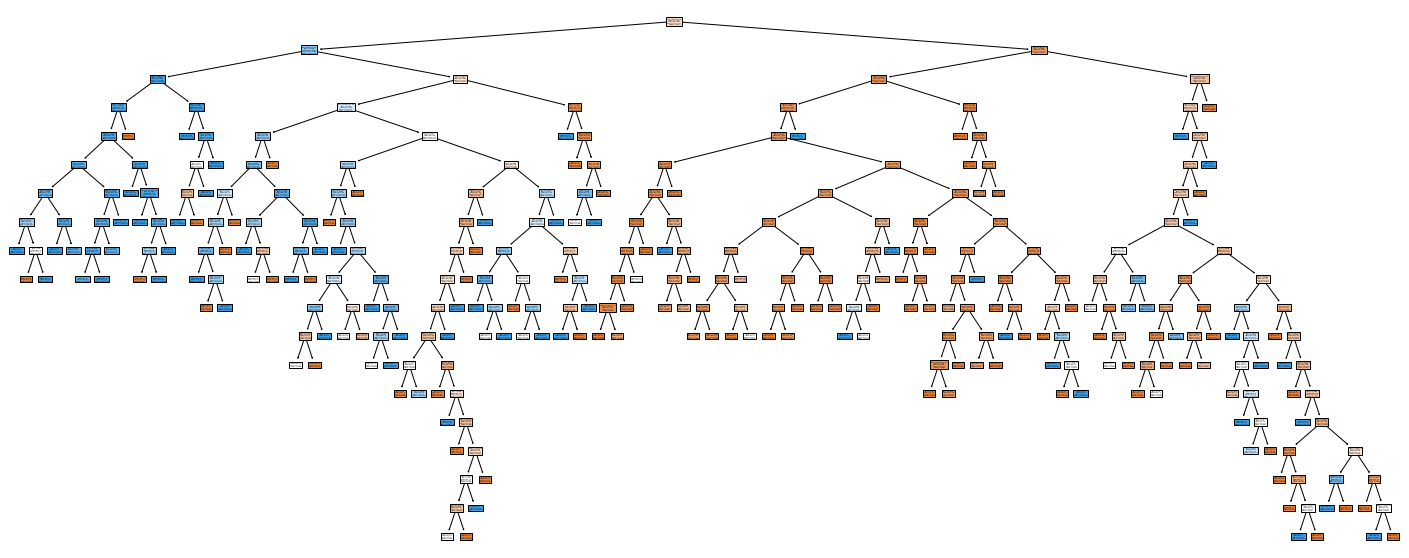

In [29]:
plt.figure(figsize = (25,10))
plot_tree(clf,
         filled=True,
         class_names = ['Died','Survived'],
         feature_names = x.columns)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


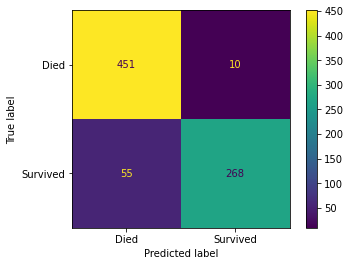

In [30]:
plot_confusion_matrix(clf, x, y, display_labels = ['Died', 'Survived'])

In [31]:
predict = clf.predict(x) #predict(x) retorna o Y chapéu 

In [32]:
accuracy_score(y, predict)

0.9170918367346939

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [34]:
clf = DecisionTreeClassifier(random_state = 100)
clf = clf.fit(x_train, y_train)

In [35]:
y_chapeu = clf.predict(x_test)
y_chapeu_train = clf.predict(x_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


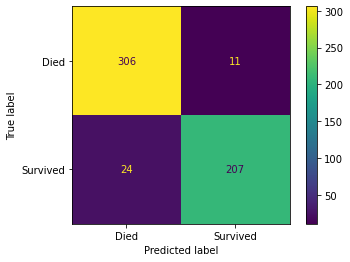

In [36]:
plot_confusion_matrix(clf, x_train, y_train, display_labels = ['Died', 'Survived'])

In [37]:
accuracy_score(y_train, y_chapeu_train)

0.9361313868613139

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


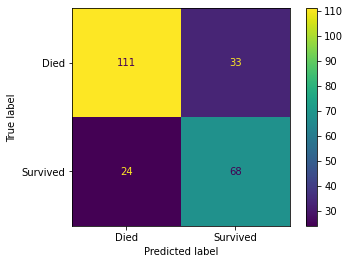

In [38]:
plot_confusion_matrix(clf, x_test, y_test, display_labels = ['Died', 'Survived'])

In [39]:
accuracy_score(y_test, y_chapeu)

0.7584745762711864

In [41]:
clf = DecisionTreeClassifier(random_state = 100)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

array([0.00000000e+00, 2.76487503e-05, 6.51720542e-05, 6.51720542e-05,
       1.14848655e-04, 1.21654501e-04, 1.21654501e-04, 1.21654501e-04,
       1.41640598e-04, 1.62206002e-04, 3.04136253e-04, 3.11606266e-04,
       3.91032325e-04, 3.91032325e-04, 4.05515004e-04, 4.05515004e-04,
       4.42380004e-04, 5.21376434e-04, 5.41915505e-04, 6.08272506e-04,
       6.08272506e-04, 7.60340633e-04, 8.70046924e-04, 8.99736415e-04,
       9.38477581e-04, 9.73236010e-04, 1.01378751e-03, 1.04275287e-03,
       1.08137334e-03, 1.12253926e-03, 1.30344108e-03, 1.36861314e-03,
       1.45308727e-03, 1.57750242e-03, 1.61152716e-03, 1.66840459e-03,
       1.71747531e-03, 1.74547763e-03, 1.76952002e-03, 1.80718643e-03,
       1.81073008e-03, 1.86228724e-03, 2.03239438e-03, 2.83054723e-03,
       3.24412003e-03, 3.28467153e-03, 3.97287163e-03, 3.98487099e-03,
       4.21233046e-03, 9.25243996e-03, 2.25877660e-02, 4.27523164e-02,
       1.60365178e-01])